In [12]:
!nvidia-smi

Fri Dec 15 17:40:10 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GT 1030         Off | 00000000:01:00.0  On |                  N/A |
| 50%   40C    P0              N/A /  30W |    888MiB /  2048MiB |     25%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [13]:
import torch

print(torch.cuda.is_available())
print(torch.__version__)

True
2.0.1+cu117


In [14]:
import numpy as np

# 4个人对3部电影的评分
interest_score = np.random.randint(10, size=(4, 3))
print(interest_score)

# 3部电影的总分
print(np.sum(interest_score, axis=0))

# 每个人打的总分
print(np.sum(interest_score, axis=1).reshape(4, 1))

# 每部电影的平均分
print(np.mean(interest_score, axis=0))
print(np.average(interest_score, axis=0))

[[8 8 3]
 [8 0 6]
 [3 6 1]
 [8 2 9]]
[27 16 19]
[[19]
 [14]
 [10]
 [19]]
[6.75 4.   4.75]
[6.75 4.   4.75]


img_pil.size (66, 63)
arr_pli.shape (63, 66, 4)


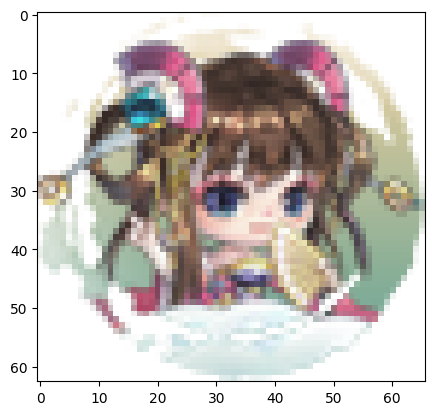

<class 'numpy.ndarray'>
img_cv.shape (63, 66, 4)


libpng warning: iCCP: known incorrect sRGB profile


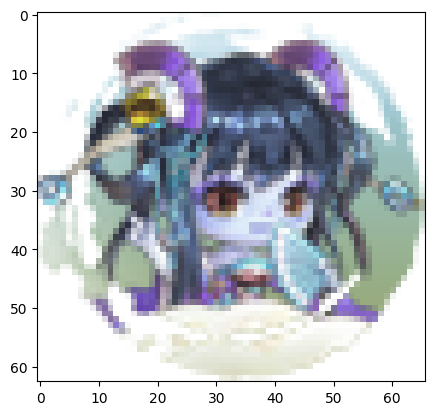

(63, 66, 1)
arr_pli0.shape (63, 66)
arr_pli0_c1.shape (63, 66, 1)
arr_pli0_c3.shape (63, 66, 3)
arr_pli1_c3.shape (63, 66, 3)


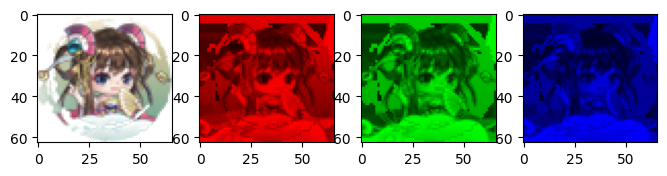

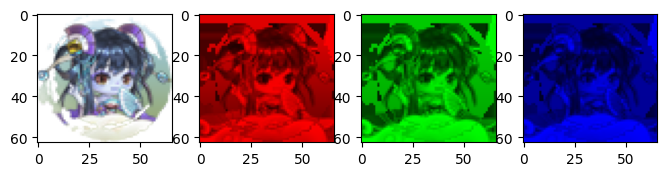

In [42]:
# 分别使用pillow和opencv方式读取图片
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# width 66, height 63
img_pil = Image.open('data/1.png')
print('img_pil.size', img_pil.size)
w = img_pil.size[0]
h = img_pil.size[1]
arr_pli = np.asarray(img_pil)
print('arr_pli.shape', arr_pli.shape)
plt.imshow(arr_pli)
plt.show()

img_cv = cv2.imread('data/1.png', cv2.IMREAD_UNCHANGED)
print(type(img_cv))
print('img_cv.shape', img_cv.shape)
plt.imshow(img_cv)
plt.show()

zeros = np.zeros((arr_pli.shape[0], arr_pli.shape[1], 1), dtype=np.uint8)
print(zeros.shape)

arr_pli0 = arr_pli[:, :, 0]
print('arr_pli0.shape', arr_pli0.shape)
arr_pli0_c1 = arr_pli0[:, :, np.newaxis]
print('arr_pli0_c1.shape', arr_pli0_c1.shape)
arr_pli0_c3 = np.concatenate((arr_pli0_c1, zeros, zeros), axis=2)
print('arr_pli0_c3.shape', arr_pli0_c3.shape)
arr_pli1_c3 = np.zeros((arr_pli.shape[0], arr_pli.shape[1], 3), dtype=np.uint8)
arr_pli1_c3[:, :, 1] = arr_pli[:, :, 1]
print('arr_pli1_c3.shape', arr_pli1_c3.shape)
arr_pli2_c3 = np.zeros((arr_pli.shape[0], arr_pli.shape[1], 3), dtype=np.uint8)
arr_pli2_c3[:, :, 2] = arr_pli[:, :, 2]
fig, axs = plt.subplots(1, 4, figsize=(8, 2))
axs[0].imshow(arr_pli)
axs[1].imshow(arr_pli0_c3)
axs[2].imshow(arr_pli1_c3)
axs[3].imshow(arr_pli2_c3)
plt.show()

img_cv0_c3 = np.zeros((img_cv.shape[0], img_cv.shape[1], 3), dtype=np.uint8)
img_cv0_c3[:, :, 0] = img_cv[:, :, 2]
img_cv1_c3 = np.zeros((img_cv.shape[0], img_cv.shape[1], 3), dtype=np.uint8)
img_cv1_c3[:, :, 1] = img_cv[:, :, 1]
img_cv2_c3 = np.zeros((img_cv.shape[0], img_cv.shape[1], 3), dtype=np.uint8)
img_cv2_c3[:, :, 2] = img_cv[:, :, 0]
fig, axs = plt.subplots(1, 4, figsize=(8, 2))
axs[0].imshow(img_cv)
axs[1].imshow(img_cv0_c3)
axs[2].imshow(img_cv1_c3)
axs[3].imshow(img_cv2_c3)
plt.show()